<a href="https://colab.research.google.com/github/tikendraw/Deeplearning/blob/main/Fashion_mnist_dataset/Fashion_mnist_DeepLearning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Mnist Dataset

In [ ]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
import random
import matplotlib.pyplot as plt
import pandas  as pd
from datetime import datetime as dt


In [ ]:
#Importing Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
labels = {0	:'T-shirt/top'
,1	:'Trouser'
,2	:'Pullover'
,3	:'Dress'
,4	:'Coat'
,5	:'Sandal'
,6	:'Shirt'
,7	:'Sneaker'
,8	:'Bag'
,9	:'Ankle boot'}

In [ ]:
# Fuction to return label from index
def get_label(index):
    return labels[index]

In [ ]:
get_label(3)

'Dress'

In [ ]:
# shape check
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# visualizing the Data

Text(0.5, 1.0, 'T-shirt/top')

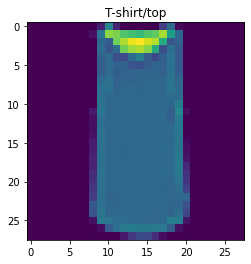

In [ ]:
# visualizing the dataset
plt.imshow(x_train[2])
plt.title(get_label(y_train[2]))

In [ ]:
# Let's visualize some more dataset
def viz_dataset(X , y, figsize:tuple = (20,8), how_many = 25, row_and_col: tuple = (3,10)):
    plt.figure( figsize = figsize )
    if row_and_col[0] * row_and_col[1] > how_many:
        for i in range (how_many):
            num = random.randint( 0, len(x_train))
            plt.subplot(  row_and_col[0], row_and_col[1], i+1)
            plt.imshow( X[num])
            plt.title( get_label( y[num] ) )
            i+=1
    else:
        print('Enter more number of rows and columns to fit well')

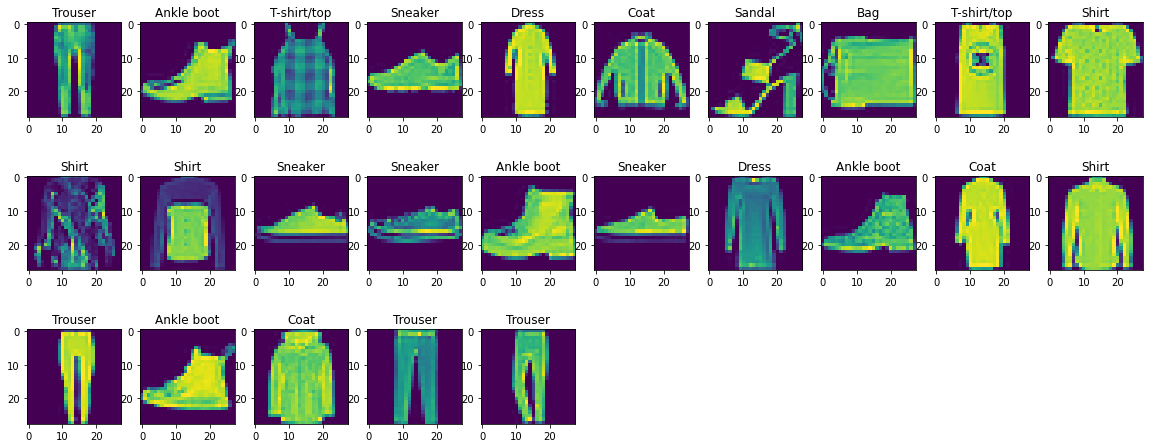

In [ ]:
viz_dataset(x_train, y_train)

# Scaling / Normalizing the data

In [ ]:
xtrain = tf.cast(x_train/255, dtype = tf.float32)
ytrain = tf.cast(y_train, dtype = tf.int16)
xtest = tf.cast(x_test/255, dtype = tf.float32)
ytest = tf.cast(y_test, dtype = tf.int16)

# Creating Model

In [ ]:
model = keras.Sequential()
# model.add(keras.layers.Input(28,28))
model.add(keras.layers.Flatten())
model.add(Dense(units = 28*28, activation = 'relu'))
model.add(keras.layers.Dropout(.3))
model.add(Dense(units = 20*20, activation = 'relu'))
model.add(keras.layers.Dropout(.3))
model.add(Dense(units = 10*10, activation = 'relu'))
model.add(keras.layers.Dropout(.3))
model.add(Dense(units = 8*8, activation = 'relu'))
model.add(keras.layers.Dropout(.3))
model.add(Dense(units =  10, activation = 'softmax'))

#compile the modle
model.compile( optimizer = tf.keras.optimizers.Adam(),
            loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])


#fit the model 
history = model.fit(xtrain, ytrain,batch_size = 64, epochs = 50, validation_split = .2)


Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.7412 - accuracy: 0.7319 - val_loss: 0.4712 - val_accuracy: 0.8306
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5069 - accuracy: 0.8231 - val_loss: 0.4034 - val_accuracy: 0.8509
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4558 - accuracy: 0.8416 - val_loss: 0.4056 - val_accuracy: 0.8508
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4247 - accuracy: 0.8509 - val_loss: 0.3856 - val_accuracy: 0.8644
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4034 - accuracy: 0.8582 - val_loss: 0.3649 - val_accuracy: 0.8669
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3907 - accuracy: 0.8617 - val_loss: 0.3489 - val_accuracy: 0.8693
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3748 - accuracy: 0.8692 - val_loss: 0.3390 - val_accuracy: 0.8763
Epoch 

In [ ]:
# Saving the Model 
model.save('./saved_model/fashion_mnist_DL_model.h5')
model = tf.keras.models.load_model('./saved_model/fashion_mnist_DL_model.h5')

# Visualizing Model preformance

In [ ]:
# create dataframe from history variable
data = pd.DataFrame(history.history)
data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.741203,0.731896,0.471177,0.830583
1,0.506936,0.823125,0.403359,0.850917
2,0.455783,0.841604,0.405622,0.850833
3,0.424723,0.850875,0.385637,0.864417
4,0.403374,0.858187,0.364858,0.866917


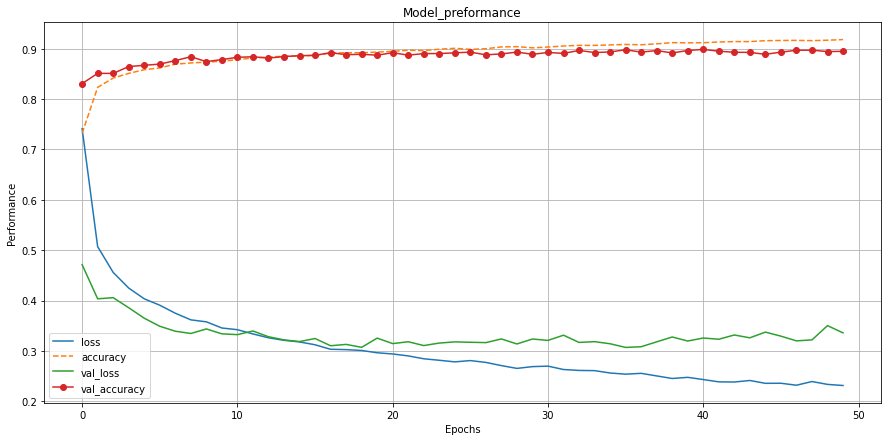

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(data.loss, label = 'loss')
plt.plot(data.accuracy ,linestyle = 'dashed' ,label = 'accuracy')
plt.plot(data.val_loss, label = 'val_loss')
plt.plot(data.val_accuracy, marker = 'o', label = 'val_accuracy')
plt.legend()
plt.title('Model_preformance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.savefig(f'Model_preformance_{dt.now()}.jpg')

# Evaluating the Model

In [ ]:
ypred = model.predict(xtest)
ypred[:4]

array([[1.5878019e-24, 4.0444972e-21, 2.2901107e-23, 1.1283155e-23,
        3.9131398e-23, 5.0906106e-08, 6.6243774e-24, 9.2941329e-05,
        2.3628211e-26, 9.9990702e-01],
       [5.0886797e-06, 6.0343890e-13, 9.8240650e-01, 2.6034550e-09,
        1.0081312e-02, 1.0330697e-16, 7.5070988e-03, 1.1435377e-18,
        1.5260500e-09, 7.0046668e-19],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.5419491e-37,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3904328e-33, 1.0000000e+00, 0.0000000e+00, 2.7843488e-29,
        0.0000000e+00, 0.0000000e+00, 5.0193150e-36, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [113]:
def all_metrics(y_true, y_pred, heatmap = True):
    from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix, accuracy_score
    import seaborn as sns
    print('Accuracy score: ',accuracy_score(y_true, y_pred))
    print('f1 score: ',f1_score(y_true, y_pred, average='macro'))
    print( 'precision score: ', precision_score(y_true, y_pred, average='macro'))
    print('recall score: ',recall_score(y_true,y_pred, average='macro'))
    # auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    # print('AUC: %.3f' % auc)
    if heatmap:
        sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,cmap='Blues', fmt='g')
    else:
        print(confusion_matrix(y_true, y_pred))

In [114]:
dd = tf.argmax(ypred, axis = 1)
dd[43]

<tf.Tensor: shape=(), dtype=int64, numpy=7>

Accuracy score:  0.8919
f1 score:  0.8920081132866393
precision score:  0.8925635228649582
recall score:  0.8919


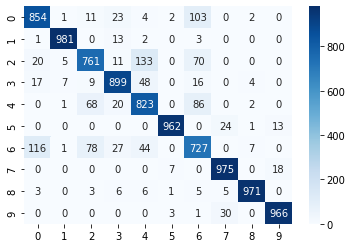

In [115]:
all_metrics(ytest,dd)

In [ ]:
label_list = list(labels.values())
label_list

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#lets see the data, prediction and true value altogather
def show_prediction(xtest, ytest, ypred, how_many = 5, row_and_col:tuple = (4,5)):
    yargs = tf.argmax(ypred, axis = 1)
    num = random.randint( 0, len(xtest))
    yprob = tf.reduce_max(ypred[num])
    pred_label = get_label( yargs[num].numpy())
    true_label = get_label(ytest[num].numpy())

    
    if yprob >= 0.9:
        color = 'blue'
    else:
        color =  'red'

    plt.figure(figsize = (10,5))

    plt.subplot(1,2,1)
    plt.imshow(xtest[num])
    plt.title( f'{pred_label} {yprob:.2f} % Actual:{true_label}' , color = color)

    plt.subplot(1,2,2)
    plt.bar(label_list, ypred[num], color=color, label = 'Predicted')
    plt.xticks(rotation = 90)
        # plt.bar(label_list, ytest[num], color="#333777", label = 'True')



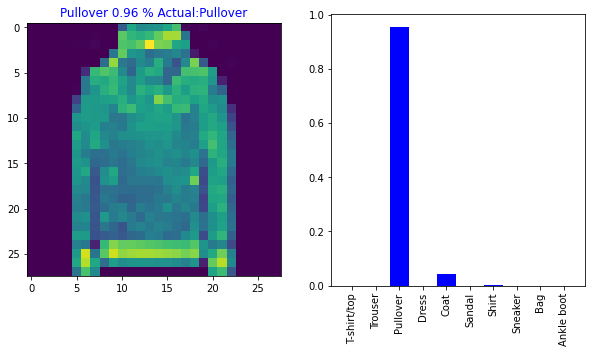

In [ ]:
show_prediction(xtest, ytest, ypred)